# Exploring Impacts of Snowpack Depth and Temperature Changes on the Ski Industry 
 Author: Jeremy Larkin
 
Date: April 13, 2023

Liscense: MIT -- https://opensource.org/licenses/MIT

## Introduction
 A change in snowpack depth over time is important to hydrology because snowpack is a crucial piece in the hydrological cycle. Snowpack provides a store of freshwater that feeds rivers that transports water to the surrounding watersheds. Changes in snowpack volume and melt rate can have drastic effects on the environment and infrastructure. For example, a decrease in snowpack depth can lead to lower flow during melt season and drier streams in the summer, causing water supply issues related to  irrigation and a lack of water for plants and wildlife. On the flip side, an increase in snowpack depth can lead to more flooding impacting infrastructure and putting people at risk. More specifically, changes in snowpack has impacts on the ski industry and the economy of ski towns. If there is a significant change in snowpack over time, does the relationship of snowpack depth and temperature seem to be related?

## Research Question 
A changing snowpack has the potential to make big impacts on the ski industry. Of all places to study, Colorado is known for their ski conditions with the Rocky Mountains cutting through the state. A decrease in snowpack depth can lead to shorter ski seasons, reduced snow quality, and fewer visitors travelling to ski resorts. This can have significant economic impacts on the ski industry, including decreased revenue, loss of jobs, and reduced investment in ski resort infrastructure.

On a larger scale, the ski industry contributes to the overall economy of local communities, most directly impacting small businesses and tourism-dependent industries. Therefore, changes in snowpack depth can have growing effects on the local economy, affecting the broader community. Many ski resorts have made investments in snowmaking technology to protect against climate change and changing snowfall conditions.

This experiment is designed to determine if there is a significant decrease in Colorado snowpack over the last couple decades, and what the risks may be for the ski industry. 

## Site Description
The extent of the study site is the Rocky Mounains of Colorado surrounding the SNOTEL gauge on Grizzly Mountain. SNOTEL stands for snow telemetry and it provides data including snow depth, temperature, snow water equivalent, and precipitation data at a high elevation location using an automated collection device.

## Data Description
The dataset used in this study is daily snow depth and temperature SNOTEL data from the USDA site from site number 505, on Grizzly Peak, CO. The snow depth dataset has data for a duration of 22 years beginning in 2001 and continues through March of 2023 while the temperature data has a 43 year data record beginning in 1980.

## Snowpack Data Code

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import os
import datetime as datetime
os.chdir('C:/Users/jdlar/OneDrive/Documents/Jeremy College/ESCI796/Final Project')

In [2]:
#%% Specify Parameters

subfolder_name_snow= "Grizzly Peak, CO Snowpack"

subfolder_name_temp= "Grizzly Peak, CO Temperature"

# Name of study site location used for figure titles
fig_title='Grizzly Peak, CO'

# Data file for first full year of snow depth data
infile_name_snow='505_25_YEAR=2001.csv'

# Data file for the first full year of temperature data
infile_name_temp='505_1_YEAR=1980.csv'

Loading snowpack depth data for the year of 2001 and using a defined function to run the snow depth data from the entire dataset. 

In [3]:
#%% Load snow depth data

# Read first year file and edit data using defined readsnotel function
def readsnotel(filename):
    data_snow=pd.read_csv(filename,header=1,na_values=[-99.9,201],parse_dates=['Date'],index_col='Date')
    data_snow=data_snow.rename(columns={'SNWD.I-1 (in) ':'Snowdepth (in)'})
    data_snow=data_snow[['Snowdepth (in)']]
    data_snow['Snowdepth (cm)']=data_snow['Snowdepth (in)']*2.54  #convert snow depth from in to cm
    return data_snow

filename_snow=os.listdir(subfolder_name_snow)

if 'data' in globals():
    del data_snow

#Use for loop to run all data 
for filename in filename_snow:
    data_snow1=readsnotel(subfolder_name_snow+'\\'+filename)
    try:
        data_snow=pd.concat([data_snow,data_snow1])
    except:
        data_snow=data_snow1
    data_snow.sort_index(inplace=True)

Loading temperature data for the first year on record (1980) and using a defined function to run the temperature data from the entire dataset

In [4]:
#%% Load Temperature Data

# Read first year file and edit data using defined readsnotel function
def readtemp(filename):
    data_temp=pd.read_csv(filename,header=1,na_values=[-99.9,33.2,0,-50],parse_dates=['Date'],index_col='Date')
    data_temp=data_temp.rename(columns={'TAVG.D-1 (degC) ':'Ave Temp (C)'})
    data_temp=data_temp[['Ave Temp (C)']]
    return data_temp

filename_temp=os.listdir(subfolder_name_temp)

#Use for loop to run all data 
for filename in filename_temp:
    data_temp1=readtemp(subfolder_name_temp+'\\'+filename)
    try:
        data_temp=pd.concat([data_temp,data_temp1])
    except:
        data_temp=data_temp1
    data_temp.sort_index(inplace=True)

Data wrangling including removing outlier data and unreasonable values from the snow depth and temperature data.

In [5]:
#%% Snow Data Correction; Removing values with a large differential and filling them
#with the previous data point

for i in range (5):
    
    data_snow['difference']=data_snow['Snowdepth (cm)'].diff()
    data_snow.loc[data_snow['difference']>50,'Snowdepth (cm)']=np.nan
    data_snow.loc[data_snow['Snowdepth (cm)']<0,'Snowdepth (cm)']=np.nan
    data_snow.fillna(method='ffill',inplace=True)
    
# Temperature Data Correction; Removing outlier values  
data_temp.loc[data_temp['Ave Temp (C)']<-40,'Ave Temp (C)']=np.nan

Plotting snowpack depth in centimeters over the duration of the period of study. 

Text(0.5, 1.0, 'Grizzly Peak, CO')

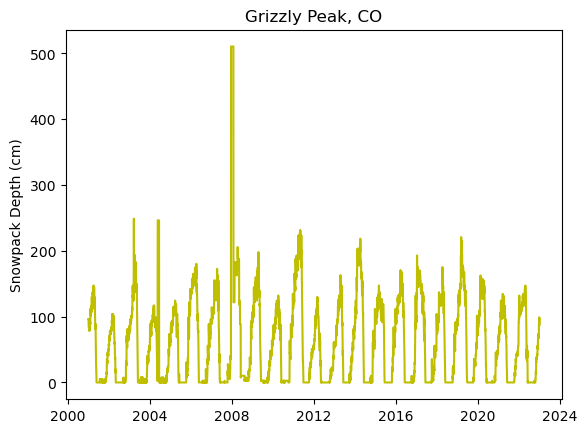

In [6]:
#%% Snowpack time series plot
    
fig, (ax1) =plt.subplots()

ax1.plot(data_snow['Snowdepth (cm)'],'y-')
ax1.set_ylabel('Snowpack Depth (cm)')
ax1.set_title(fig_title)

Plotting temperature data in degrees celcius over the duration of the study period

Text(0.5, 1.0, 'Grizzly Peak, CO')

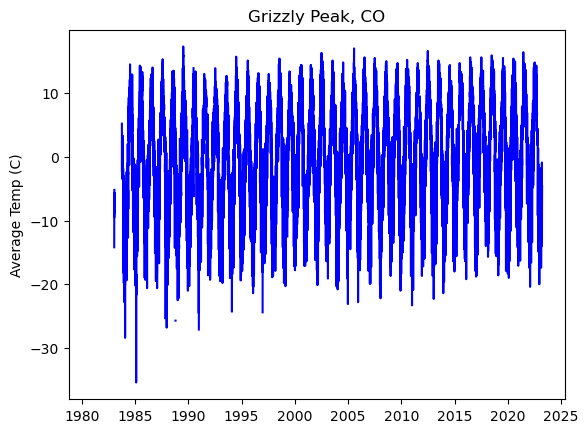

In [7]:
#%% Temperature time series plot

fig, (ax2) =plt.subplots()

ax2.plot(data_temp['Ave Temp (C)'],'b-')
ax2.set_ylabel('Average Temp (C)')
ax2.set_title(fig_title)


### Calculations:
Is the snowpack each year been trending up or down in the last quarter century? Calculating the total yearly snowpack over time.
Has the mean temperature each year shifted upwards (or downwards) in the last 40 years? Calculating the average yearly temperature over time.

### Statistical Trends
Using statistics to determine if any trends are statistically significant using p values. P values less than 0.05 signify a statistically significant trend in snowpack change over time or average temperature over time. 

## Discussion and Conclusion
In this section the dataframes, graphs, and calculations will by analyzed and conclusions regarding if snow depth is changing over time will be made. 

Regardless if any trends are significant, does there appear to be a relationship between changing temperature and changing snow pack over the course of each data record? The confidnce of a relationship will be discussed. Lastly, with the trends that are shown what could the impacts be on the ski industry and the people who rely on ski tourism and what could happen in the future if the trends continue. 